# Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In [1]:
# import necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# import modified data set

df_wine = pd.read_csv("winequality_modified.csv")

In [3]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,fixed_acidity_level,volatile_acidity_level,citric_acid_level,residual_sugar_level,chlorides_level,free_sulfur_dioxide_level,total_sulfur_dioxide_level,density_level,pH_level,sulphates_level,alcohol_level
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,high,high,low,medium,high,medium,low,high,mod_high,high,medium
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,high,high,low,medium,high,low,low,high,medium,high,medium
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high,medium,high,medium,high,medium,low,high,mod_high,mod_high,medium
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,mod_high,high,low,medium,high,low,low,high,low,mod_high,low
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,mod_high,high,low,low,high,low,low,high,low,mod_high,low


## Average quality score by wine color.

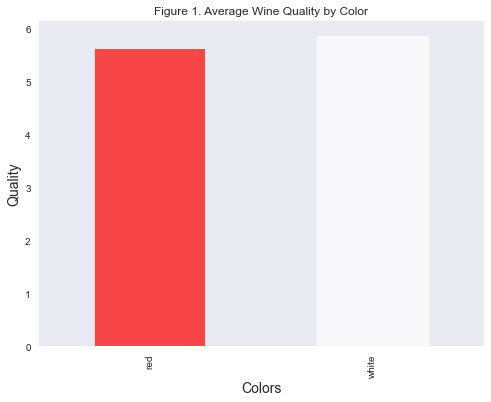

In [4]:
colors = ['red', 'white']
sns.set_style('dark')
color_mean = df_wine.groupby('color').quality.mean()
color_mean.plot(kind='bar', title="Figure 1. Average Wine Quality by Color", color=colors, alpha = 0.7, figsize=(8,6));
plt.xlabel('Colors', fontsize=14);
plt.ylabel('Quality', fontsize=14);

In [5]:
df_wine.groupby('color').quality.mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

* Thus the mean rating of white wine is rather greater than rating of red wine. Average rating of __red wine is 5.62__ whereas __white wine is 5.85__.

## How is red and white wine rated in the dataset  ?

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [6]:
# get counts for each rating and color and get total counts for each color

color_counts = df_wine.groupby(['color', 'quality']).count()['pH']
color_totals = df_wine.groupby('color').count()['pH']

In [7]:
# get proportions by dividing counts for each quality rating / total counts for each color

red_proportion = color_counts['red'] / color_totals['red']
white_proportion = color_counts['white'] / color_totals['white']

In [8]:
# check data
red_proportion

quality
3    0.007358
4    0.038999
5    0.424577
6    0.393672
7    0.122884
8    0.012509
Name: pH, dtype: float64

In [9]:
# check data
white_proportion

quality
3    0.005049
4    0.038627
5    0.296642
6    0.451401
7    0.173946
8    0.033072
9    0.001262
Name: pH, dtype: float64

* We can observe an abnormality in data as color red has no value in 9. There for the data would be uneven while plotting the data, we must allocate value 0 in 9 (quality).

In [10]:
# modify
red_proportion['9'] = 0

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [11]:
ind = np.arange(len(red_proportion))  # the x locations for the groups
width = 0.35       # the width of the bars

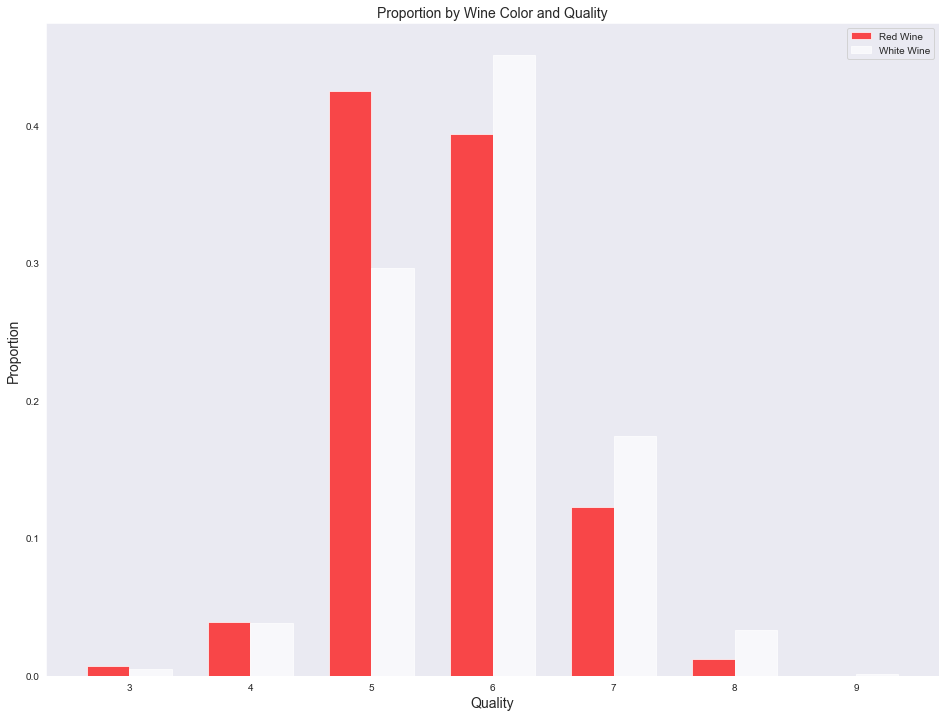

In [35]:
# plot bars
f, ax = plt.subplots(figsize=(16,12))
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Red Wine');
white_bars = plt.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='White Wine');

# title and labels
plt.ylabel('Proportion', fontsize = 14)
plt.xlabel('Quality', fontsize = 14)
plt.title('Proportion by Wine Color and Quality', fontsize = 14)
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

* We can observe that the proportion of red wine decreases decreases as the Quality goes up, which means the red wine gets less Quality Score. The red wine retains majority of the Quality score below 6, and white wine gets more Quality Ratings greater than 5. From the above figure we can visualize it that the white wine recieves relatively less Quality Score 5, in other hand red wine goes on decreases and even at a point with Quality 9 it recieves no score, which implies no red wine ha been rated 9. We can clearly declare white wine as the winner.

## Relationship of various factors with with Quality

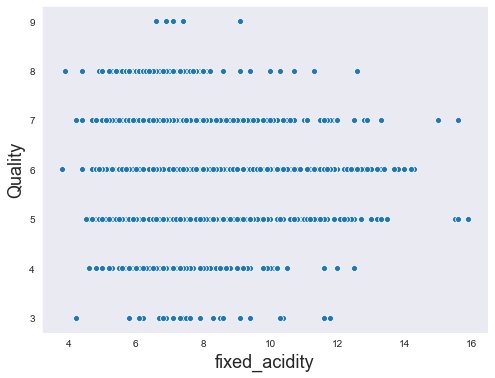

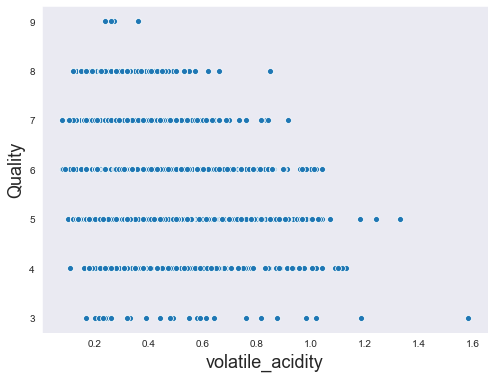

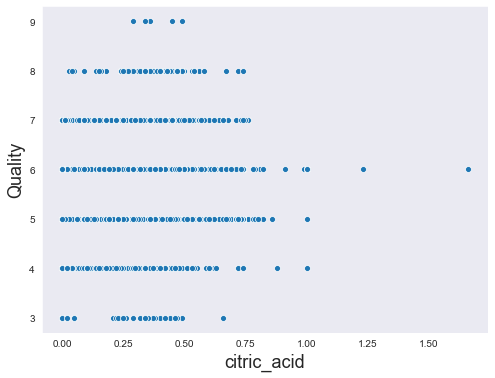

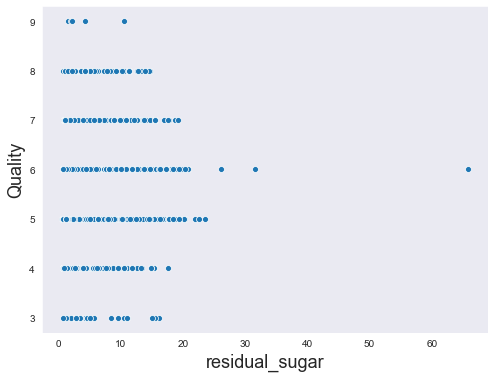

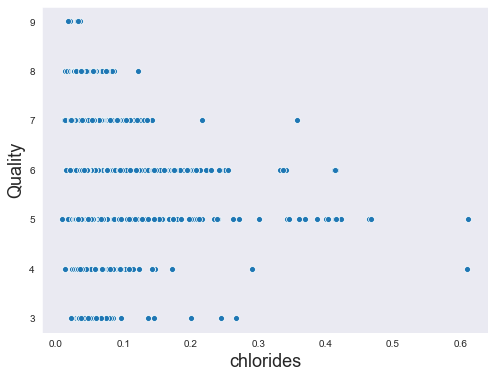

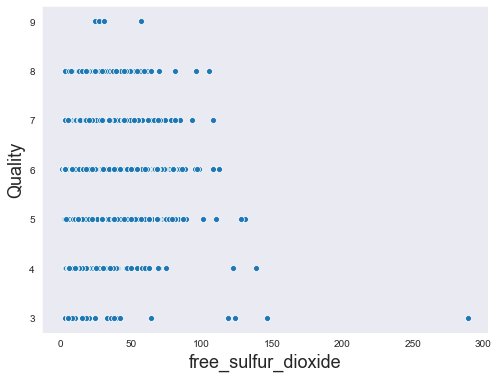

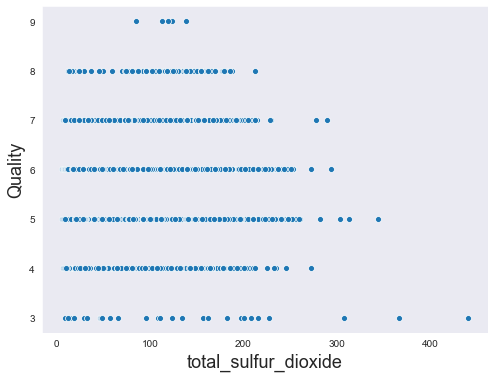

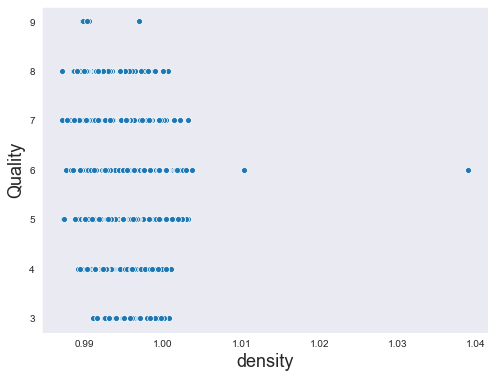

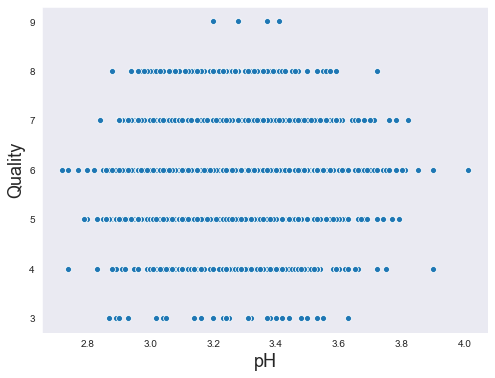

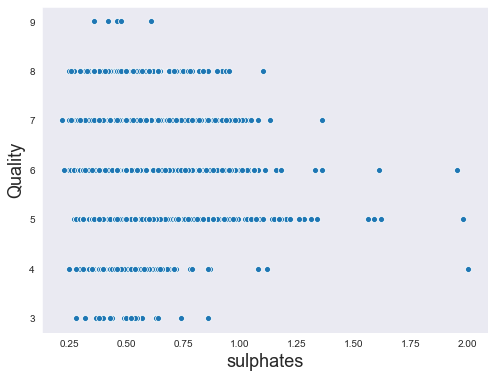

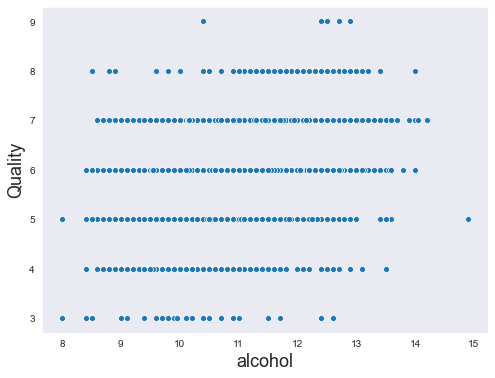

In [25]:
# Scatter Plots

for col in df_wine.columns[:12]:
    if col == 'quality':
        pass
    else:
        plt.figure(figsize=(8,6))
        b = sns.scatterplot(x=col, y='quality', data=df_wine)
        b.set_xlabel(col,fontsize=18)
        b.set_ylabel("Quality",fontsize=18)

* From the above scratter plots we conclude that columns __pH__ and __alcohol__ are related with __Quality__ of the wine. We can imply this by, how compact and dense are the plots, which also reveals that it has positive relation. 